In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime, warnings, scipy 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\assignment-rw\assignment-rw\FlightDelays.csv")

In [3]:
data.columns

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'FlightStatus'],
      dtype='object')

In [4]:
data['FlightStatus'] = (data['FlightStatus'] !='ontime').astype(int)

In [5]:
print("There are {} unique origin city".format(data['ORIGIN'].nunique()))
print("There are {} unique destination city".format(data['DEST'].nunique()))

There are 3 unique origin city
There are 3 unique destination city


In [6]:
data['FlightStatus'].value_counts()

0    1773
1     428
Name: FlightStatus, dtype: int64

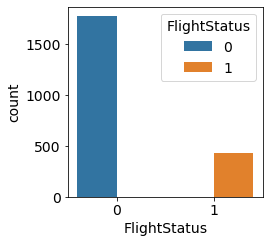

In [7]:
fig = plt.figure(1, figsize=(3.5,3.5))
ax = sns.countplot(x="FlightStatus",hue='FlightStatus', data=data)

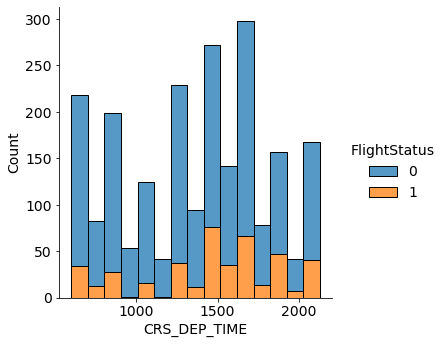

In [8]:
sns.displot(data = data,x = "CRS_DEP_TIME",hue = "FlightStatus",multiple="stack")

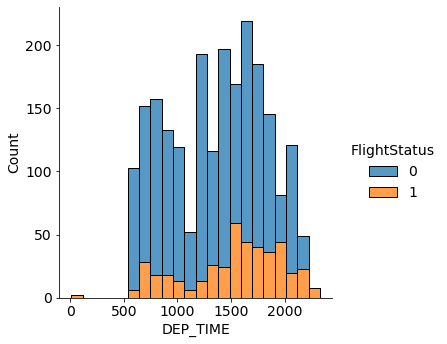

In [9]:
sns.displot(data = data,x = "DEP_TIME",hue = "FlightStatus",multiple="stack")

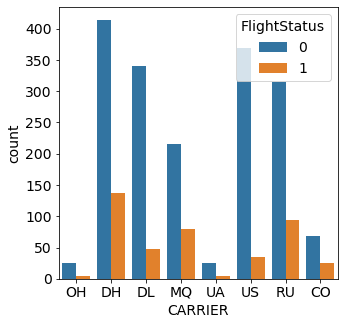

In [10]:
fig = plt.figure(1, figsize=(5,5))
ax = sns.countplot(x="CARRIER",hue='FlightStatus', data=data)

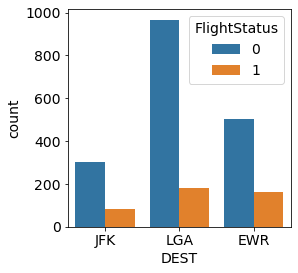

In [11]:
fig = plt.figure(1, figsize=(4,4))
ax = sns.countplot(x="DEST",hue='FlightStatus', data=data)

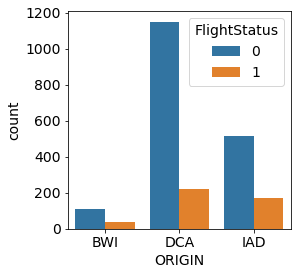

In [12]:
fig = plt.figure(1, figsize=(4,4))
ax = sns.countplot(x="ORIGIN",hue='FlightStatus', data=data)

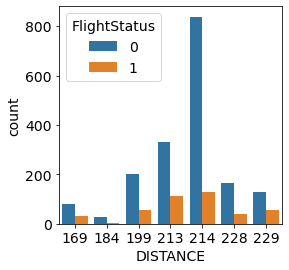

In [13]:
fig = plt.figure(1, figsize=(4,4))
ax = sns.countplot(x="DISTANCE",hue='FlightStatus', data=data)

<AxesSubplot:xlabel='FL_DATE'>

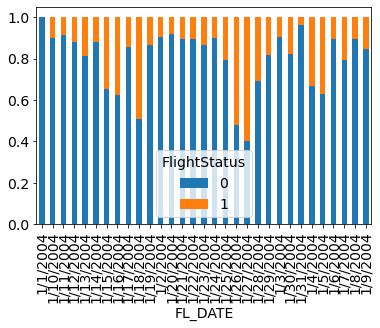

In [14]:
table=pd.crosstab(data.FL_DATE,data.FlightStatus)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='DAY_OF_MONTH'>

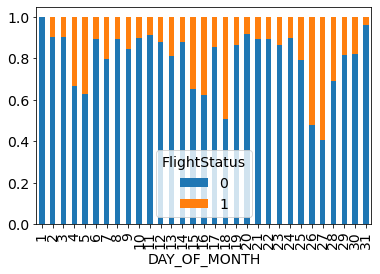

In [15]:
table=pd.crosstab(data.DAY_OF_MONTH,data.FlightStatus)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

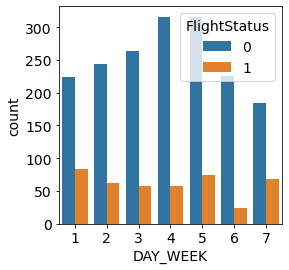

In [16]:
fig = plt.figure(1, figsize=(4,4))
ax = sns.countplot(x="DAY_WEEK",hue='FlightStatus', data=data)

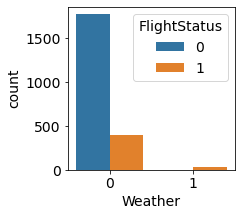

In [17]:
fig = plt.figure(1, figsize=(3,3))
ax = sns.countplot(x="Weather",hue='FlightStatus', data=data)

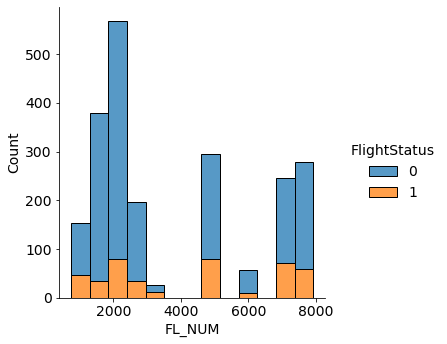

In [18]:
sns.displot(data = data,x = "FL_NUM",hue = "FlightStatus",multiple="stack")

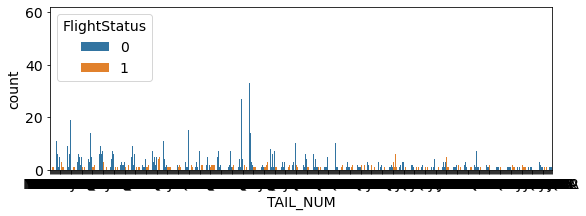

In [19]:
fig = plt.figure(1, figsize=(9,3))
ax = sns.countplot(x="TAIL_NUM",hue='FlightStatus', data=data)

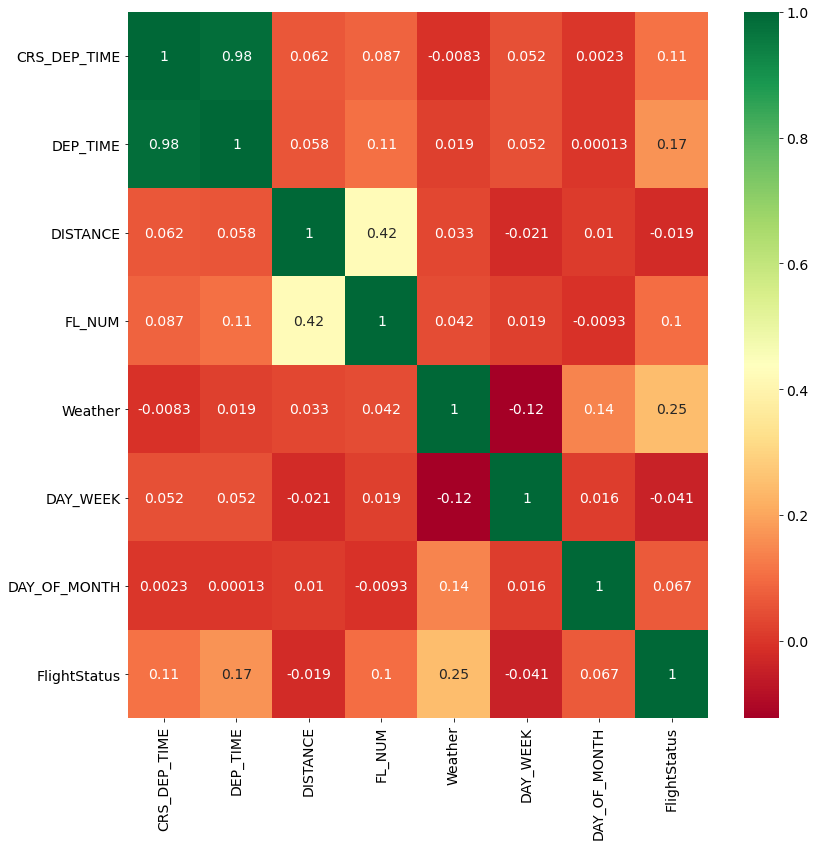

In [20]:
X = data.iloc[:,0:13]
y = data.iloc[:,-1]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,13))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
data.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH,FlightStatus
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498,16.024989,0.194457
std,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149,8.677390,0.395872
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000,1.000000,0.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000,0.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000,0.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000,0.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000,1.000000


In [22]:
data = data[pd.notnull(data)]
data.drop('DISTANCE',
 axis='columns', inplace=True)
data.drop('TAIL_NUM',
  axis='columns', inplace=True)
data.drop('DEP_TIME',
  axis='columns', inplace=True)
data.drop('FL_DATE',
  axis='columns', inplace=True)
data.columns

Index(['CRS_DEP_TIME', 'CARRIER', 'DEST', 'FL_NUM', 'ORIGIN', 'Weather',
       'DAY_WEEK', 'DAY_OF_MONTH', 'FlightStatus'],
      dtype='object')

In [23]:
data = pd.get_dummies(data, columns = ['CRS_DEP_TIME','CARRIER','DEST','FL_NUM','ORIGIN','DAY_WEEK','DAY_OF_MONTH'], prefix = ['CRS_DEP_TIME','CARRIER','DEST','FL_NUM','ORIGIN','DAY_WEEK','DAY_OF_MONTH'])

In [24]:
print(data.columns.values)

['Weather' 'FlightStatus' 'CRS_DEP_TIME_600' 'CRS_DEP_TIME_630'
 'CRS_DEP_TIME_640' 'CRS_DEP_TIME_645' 'CRS_DEP_TIME_700'
 'CRS_DEP_TIME_730' 'CRS_DEP_TIME_735' 'CRS_DEP_TIME_759'
 'CRS_DEP_TIME_800' 'CRS_DEP_TIME_830' 'CRS_DEP_TIME_840'
 'CRS_DEP_TIME_845' 'CRS_DEP_TIME_850' 'CRS_DEP_TIME_900'
 'CRS_DEP_TIME_925' 'CRS_DEP_TIME_930' 'CRS_DEP_TIME_1000'
 'CRS_DEP_TIME_1030' 'CRS_DEP_TIME_1039' 'CRS_DEP_TIME_1040'
 'CRS_DEP_TIME_1100' 'CRS_DEP_TIME_1130' 'CRS_DEP_TIME_1200'
 'CRS_DEP_TIME_1230' 'CRS_DEP_TIME_1240' 'CRS_DEP_TIME_1245'
 'CRS_DEP_TIME_1300' 'CRS_DEP_TIME_1315' 'CRS_DEP_TIME_1330'
 'CRS_DEP_TIME_1359' 'CRS_DEP_TIME_1400' 'CRS_DEP_TIME_1430'
 'CRS_DEP_TIME_1455' 'CRS_DEP_TIME_1500' 'CRS_DEP_TIME_1515'
 'CRS_DEP_TIME_1520' 'CRS_DEP_TIME_1525' 'CRS_DEP_TIME_1530'
 'CRS_DEP_TIME_1600' 'CRS_DEP_TIME_1605' 'CRS_DEP_TIME_1610'
 'CRS_DEP_TIME_1630' 'CRS_DEP_TIME_1640' 'CRS_DEP_TIME_1645'
 'CRS_DEP_TIME_1700' 'CRS_DEP_TIME_1710' 'CRS_DEP_TIME_1715'
 'CRS_DEP_TIME_1720' 'CRS_DEP_TIME_

In [25]:
data

,Weather,FlightStatus,CRS_DEP_TIME_600,CRS_DEP_TIME_630,CRS_DEP_TIME_640,CRS_DEP_TIME_645,CRS_DEP_TIME_700,CRS_DEP_TIME_730,CRS_DEP_TIME_735,CRS_DEP_TIME_759,...,DAY_OF_MONTH_22,DAY_OF_MONTH_23,DAY_OF_MONTH_24,DAY_OF_MONTH_25,DAY_OF_MONTH_26,DAY_OF_MONTH_27,DAY_OF_MONTH_28,DAY_OF_MONTH_29,DAY_OF_MONTH_30,DAY_OF_MONTH_31
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
X = data.iloc[:, data.columns != 'FlightStatus']
y = data.iloc[:, data.columns == 'FlightStatus']

In [27]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,np.ravel(y), test_size=0.4,random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy:  0.8104426787741204
Accuracy of logistic regression classifier on test set: 0.81


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       712
           1       0.51      0.30      0.38       169

    accuracy                           0.81       881
   macro avg       0.68      0.62      0.63       881
weighted avg       0.78      0.81      0.79       881



In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[663  49]
 [118  51]]


In [30]:
classifier = LogisticRegression(penalty='l2', tol=1e-6, max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000, tol=1e-06)

In [31]:
X= data.iloc[:, data.columns != 'FlightStatus']
y = data.iloc[:, data.columns == 'FlightStatus']
log = classifier.coef_[0]
pd.DataFrame(log, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
Weather,0.763874
DAY_OF_MONTH_27,0.352189
DAY_OF_MONTH_16,0.342942
DAY_OF_MONTH_18,0.336099
CRS_DEP_TIME_1515,0.287328
...,...
FL_NUM_2176,-0.286167
FL_NUM_2181,-0.301685
CRS_DEP_TIME_1645,-0.305673
FL_NUM_7810,-0.305673


In [32]:
exp = np.exp(classifier.coef_[0])
pd.DataFrame(exp, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
Weather,2.146577
DAY_OF_MONTH_27,1.422177
DAY_OF_MONTH_16,1.409087
DAY_OF_MONTH_18,1.399478
CRS_DEP_TIME_1515,1.332861
...,...
FL_NUM_2176,0.751137
FL_NUM_2181,0.739571
CRS_DEP_TIME_1645,0.736627
FL_NUM_7810,0.736627


In [33]:
from sklearn.feature_selection import RFE
model = LogisticRegression(max_iter=10000)
rfe = RFE(model,n_features_to_select = 36)

fit = rfe.fit(X, np.ravel(y))
a = X.columns
columnssel=[]
for i in range(len(fit.ranking_)):
    if fit.ranking_[i]==1:
        columnssel.append(a[i])

print(columnssel)

['Weather', 'CRS_DEP_TIME_630', 'CRS_DEP_TIME_930', 'CRS_DEP_TIME_1040', 'CRS_DEP_TIME_1330', 'CRS_DEP_TIME_1515', 'CRS_DEP_TIME_1525', 'CRS_DEP_TIME_1645', 'CRS_DEP_TIME_1900', 'CARRIER_DL', 'CARRIER_US', 'FL_NUM_746', 'FL_NUM_806', 'FL_NUM_814', 'FL_NUM_1479', 'FL_NUM_2166', 'FL_NUM_2170', 'FL_NUM_2174', 'FL_NUM_2182', 'FL_NUM_2761', 'FL_NUM_3372', 'FL_NUM_4760', 'FL_NUM_4970', 'FL_NUM_7211', 'FL_NUM_7299', 'FL_NUM_7810', 'DAY_OF_MONTH_1', 'DAY_OF_MONTH_4', 'DAY_OF_MONTH_5', 'DAY_OF_MONTH_15', 'DAY_OF_MONTH_16', 'DAY_OF_MONTH_18', 'DAY_OF_MONTH_26', 'DAY_OF_MONTH_27', 'DAY_OF_MONTH_28', 'DAY_OF_MONTH_31']


In [34]:
Xnew=data[columnssel].values
ynew=data["FlightStatus"].values
X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(Xnew,np.ravel(ynew), test_size=0.4,shuffle=True,random_state=1)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_trainnew, y_trainnew) 
pipe.score(X_testnew, y_testnew)
y_prednew = pipe.predict(X_testnew)
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_testnew, y_prednew))
plt.show()
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(pipe.score(X_testnew, y_testnew)))

Accuracy:  0.8410896708286039
Accuracy of logistic regression classifier on test set: 0.84


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_testnew, y_prednew))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       714
           1       0.63      0.40      0.49       167

    accuracy                           0.84       881
   macro avg       0.75      0.67      0.70       881
weighted avg       0.82      0.84      0.83       881



In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_testnew, y_prednew)
print(confusion_matrix)

[[674  40]
 [100  67]]
